<a href="https://colab.research.google.com/github/favourphilic/Python-Project/blob/main/HandsOnMLwithSklearnChapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this file, I share the code and summary from the end-to-end project, the  cjapter 2 of Hands on wmachine learning with scikit learn.

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Getting the Data
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#To get a quick info about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by
Machine Learning standards, but it’s perfect to get started. 

Notice that the total_bed
rooms attribute has only 20,433 non-null values, meaning that 207 districts are miss‐
ing this feature. We will need to take care of this later.

All attributes are numerical, except the ocean_proximity field. Its type is object.

 You can find out what categories exist and how many
districts belong to each category by using the value_counts() method:

In [ ]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#Lets take a quick look at the summary of the numerical features of the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 Note that the null values are
ignored (so, for example, count of total_bedrooms is 20,433, not 20,640)


The std
row shows the standard deviation (which measures how dispersed the values are).
The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indi‐
cates the value below which a given percentage of observations in a group of observa‐
tions falls. For example, 25% of the districts have a housing_median_age lower than
18, while 50% are lower than 29 and 75% are lower than 37. These are often called the
25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).


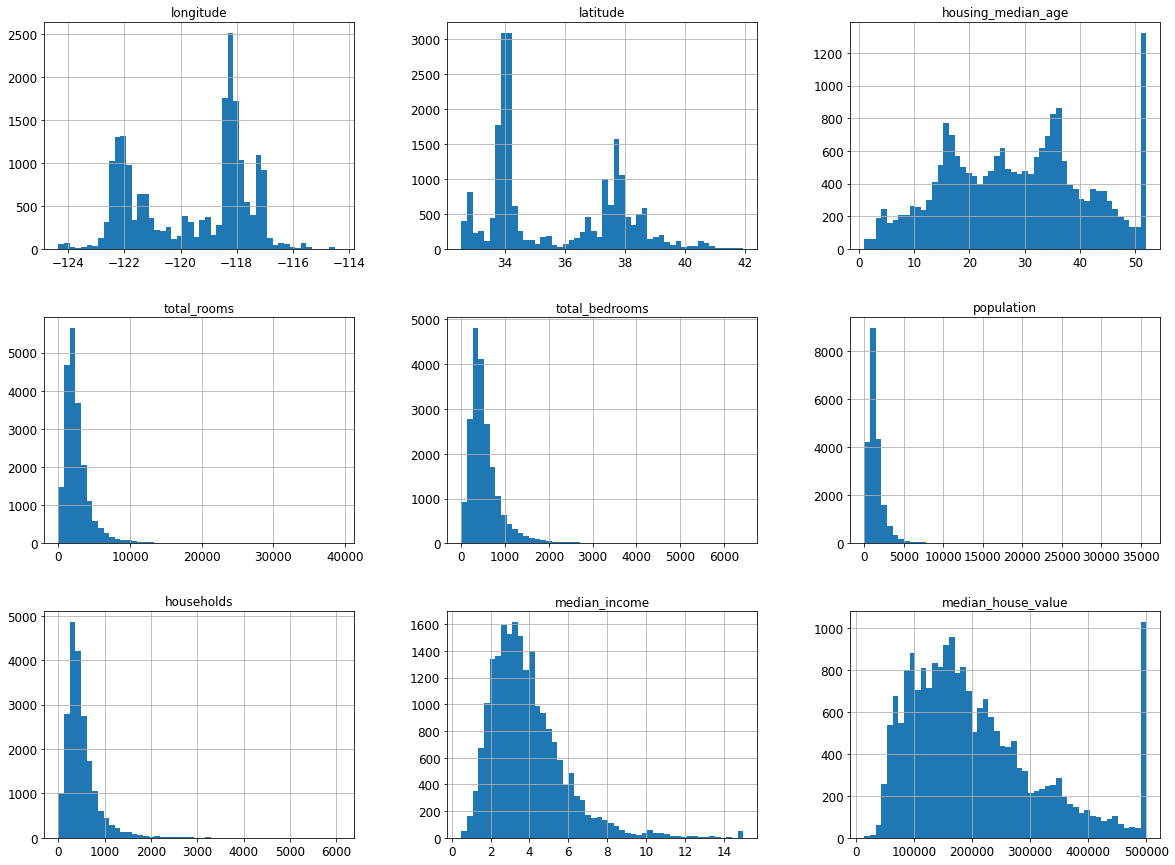

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). 

1. First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. Working with 
preprocessed attributes is common in Machine Learning, and it is not necessarily
a problem, but you should try to understand how the data was computed.

2. . The housing median age and the median house value were also capped. The lat‐
ter may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s out‐
put) to see if this is a problem or not. If they tell you that they need precise pre‐
dictions even beyond $500,000, then you have mainly two options:

a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
$500,000).

3. These attributes have very different scales. We will be exploring feature scaling later.


4.  Finally, the histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.


In [ ]:
# Randomly creating a test set
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]


In [ ]:
#Then use the function created
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


* Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning a algorithms) will get to see the whole dataset, which is what you want to avoid.
* One solution is to save the test set on the first run and then load it in subsequent runs. Another option is to set the random number generator’s seed (e.g., np.random.seed(42)) before calling np.random.permutation(), so that it always generates the same shuffled indices.
* But both these solutions will break next time you fetch an updated dataset. A com‐mon solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier). 
* For example, you could compute a hash of each instance’s identifier, keep only the last byte of the hash, and put the instance in the test set if this value is lower or equal to
51 (~20% of 256). This ensures that the test set will remain consistent across multiple
runs, even if you refresh the dataset. The new test set will contain 20% of the new
instances, but it will not contain any instance that was previously in the training set.
Here is a possible implementation:



In [ ]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [ ]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
 return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
 return data.loc[~in_test_set], data.loc[in_test_set]

#Unfortunately, the housing dataset does not have an identifier column. The simplest
#solution is to use the row index as the ID:

housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")



In [ ]:
housing_with_id.head(2)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


* If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset, and no row ever gets deleted. If this is not
possible, then you can try to use the most stable features to build a unique identifier.
For example, a district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


* Scikit-Learn provides a few functions to split datasets into multiple subsets in various
ways. The simplest function is train_test_split, which does pretty much the same
thing as the function split_train_test defined earlier, with a couple of additional
features. First there is a random_state parameter that allows you to set the random
generator seed as explained previously, and second you can pass it multiple datasets
with an identical number of rows, and it will split them on the same indices (this is
very useful, for example, if you have a separate DataFrame for labels)

In [ ]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

* So far we have considered purely random sampling methods. This is generally fine if
your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias. When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone booth. They try to ensure that these 1,000 people
are representative of the whole population. For example, the US population is com‐
posed of 51.3% female and 48.7% male, so a well-conducted survey in the US would
try to maintain this ratio in the sample: 513 female and 487 male. This is called strati‐
fied sampling: the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population.
 * If they used purely random sam‐
pling, there would be about 12% chance of sampling a skewed test set with either less
than 49% female or more than 54% female. Either way, the survey results would be
significantly biased.

* Most median income values are clustered around 2–5 (tens of thousands of dollars),
but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s
importance may be biased. This means that you should not have too many strata, and
each stratum should be large enough.
*  The following code creates an income category
attribute by dividing the median income by 1.5 (to limit the number of income cate‐
gories), and rounding up using ceil (to have discrete categories), and then merging
all the categories greater than 5 into category 5:

In [ ]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

Now you are ready to do stratified sampling based on the income category. For this
you can use Scikit-Learn’s StratifiedShuffleSplit class:


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [ ]:
#Let’s see if this worked as expected. You can start by looking at the income category
#proportions in the full housing dataset:
housing["income_cat"].value_counts() / len(housing)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

* With similar code you can measure the income category proportions in the test set.
Figure 2-10 compares the income category proportions in the overall dataset, in the
test set generated with stratified sampling, and in a test set generated using purely
random sampling. As you can see, the test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is quite skewed.

In [ ]:
#Now you should remove the income_cat attribute so the data is back to its original state:
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)


##Discover and Visualize the data to gain insight

* Make sure you have put the test set aside and you are only exploring the train‐
ing set. Also, if the training set is very large, you may want to sample an exploration
set, to make manipulations easy and fast. In our case, the set is quite small so you can
just work directly on the full set. Let’s create a copy so you can play with it without
harming the training set:


In [ ]:
housing = strat_train_set.copy()

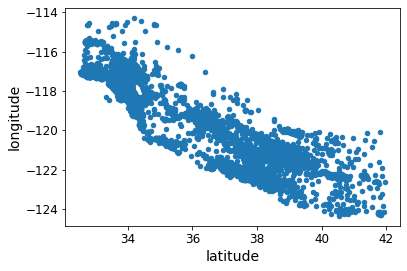

In [ ]:
#Visualizing the geographical data
housing.plot(kind="scatter", x="latitude", y="longitude")

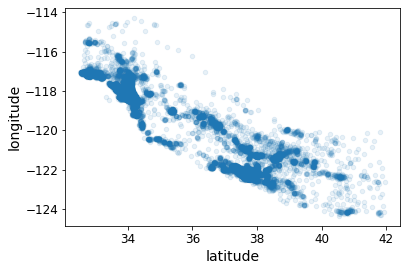

In [ ]:
#Visualizing the geographical data
housing.plot(kind="scatter", x="latitude", y="longitude", alpha=0.1)
#. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data

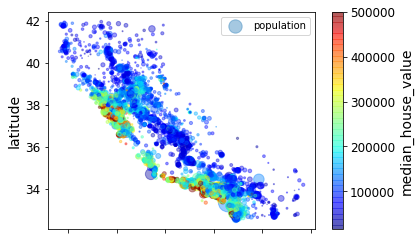

In [ ]:
# Now, lets look at the housing price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. The ocean prox‐
imity attribute may be useful as well, although in Northern California the housing
prices in coastal districts are not too high, so it is not a simple rule

In [ ]:
#Lest look for any correlations in the attributes
correlation = housing.corr()
correlation["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

You can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north)

The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot

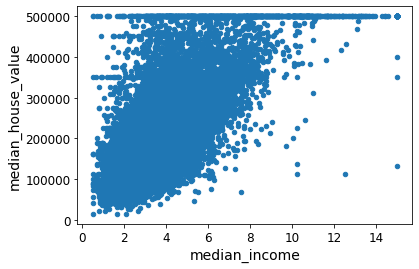

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value")

This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly an upward trend.

Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at $500,000. 

But this
plot reveals other less obvious straight lines: a horizontal line around $450,000, 

another around $350,000  

 perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

## Attribute Combination

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms.

In [ ]:
#lets create a new attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
#Now, lets take a look at the correllation again.
correlation= housing.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Good, The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are

## Preparing the data for machine learning algorithm

* It’s time to prepare the data for your Machine Learning algorithms. Instead of just
doing this manually, you should write functions to do that, for several good reasons:
 * This will allow you to reproduce these transformations easily on any dataset (e.g.,
the next time you get a fresh dataset).
 * You will gradually build a library of transformation functions that you can reuse
in future projects.
 * You can use these functions in your live system to transform the new data before
feeding it to your algorithms.
 * This will make it possible for you to easily try various transformations and see
which combination of transformations works best.
* But first let’s revert to a clean training set (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect strat_train_set)


In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [ ]:
#   1. Data Cleaning
# we want to replace the missing values in the dataset with median using Imputer object provided by sklearn.
# Since median can only be computed on numerical values, we first drop the categorical feature in the dataset
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')


In [ ]:
#Now you can fit the imputer instance to the training data using the fit() method:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:


In [ ]:
print(imputer.statistics_)

print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


Now you can use this “trained” imputer to transform the training set by replacing
missing values by the learned medians

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [ ]:
#The result is a plain Numpy array containing the transformed features. If you want to
#put it back into a Pandas DataFrame, it’s simple:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373


# Preprocessing the Categorical Input feature.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded


array([1, 4, 1, ..., 0, 0, 1])

In [ ]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. Obviously this is not the case (for
example, categories 0 and 4 are more similar than categories 0 and 1). To fix this
issue, a common solution is to create one binary attribute per category

In [ ]:
#Note that  fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

 NumPy’s reshape() function allows one dimension to be –1, which means “unspecified”:
 
  the value is inferred
from the length of the array and the remaining dimensions.

Notice that the output is a SciPy **sparse matrix**, instead of a NumPy array. This is very
useful when you have categorical attributes with thousands of categories. After onehot encoding we get a matrix with thousands of columns, and the matrix is full of
zeros except for one 1 per row. Using up tons of memory mostly to store zeros would
be very wasteful, so instead a sparse matrix only stores the location of the nonzero
elements. You can use it mostly like a normal 2D array,19 but if you really want to con‐
vert it to a (dense) NumPy array, 

just use the  .toarray()


In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

We can apply both transformations (from text categories to integer categories, then

from integer categories to one-hot vectors) in one shot using the LabelBinarizer
class:

In [ ]:
from sklearn.preprocessing import LabelBinarizer 
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Note that this returns a dense NumPy array by default. You can get a sparse matrix
instead by passing sparse_output=True to the LabelBinarizer constructor.

### Custom Tranformer
Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn func‐
tionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inher‐
itance), all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
tor as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for auto‐
matic hyperparameter tuning. For example, here is a small transformer class that adds
the combined attributes we discussed earlier:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Future Scaling
1. Transformation Pipeline

In [ ]:
#For reference, here is the old solution based on a DataFrameSelector transformer (to just select a subset of the Pandas DataFrame columns), and a FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

ABove, There is nothing in Scikit-Learn
to handle Pandas DataFrames.

so we need to write a simple custom transformer for this task

In [ ]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

We created the class MyLabelBinarizer to avoid error later in the pipeline. 

LabelBinarizer is not supposed to be used with X (Features), but is intended for labels only. Hence the fit and fit_transform methods are changed to include only single object y. But the Pipeline (which works on features) will try sending both X and y to it. Hence might want to create  error

 #### Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features.




In [ ]:
#Here is a separe pipeline for the numerical  and Categorical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


num_pipeline = Pipeline([
 ('selector', OldDataFrameSelector(num_attribs)),
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
cat_pipeline = Pipeline([
 ('selector', OldDataFrameSelector(cat_attribs)),
 ('label_binarizer', MyLabelBinarizer()),
 ])



full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). 

 Scikit-Learn provides a FeatureUnion class, which allow us to combine two pipeline (numeric and categorical to one single pipeline)

Each subpipeline starts with a selector transformer
* it simply transforms the data by
* selecting the desired attributes (numerical or categorical), dropping the rest, and con‐verting the resulting DataFrame to a NumPy array

## Select and Train the Model


In [ ]:
#Lets first train a LinearRegression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)


LinearRegression()

We now have a working Linear Regression model. Let’s try it out on a few
instances from the training set:

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lr.predict(some_data_prepared))


Predictions:	 [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
print("Labels:\t\t", list(some_labels))


Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


* It works, although the predictions are not exactly accurate (e.g., the second prediction
is off by more than 50%!). Let’s measure this regression model’s RMSE on the whole
training set using Scikit-Learn’s mean_squared_error function:

In [ ]:
 from sklearn.metrics import mean_squared_error
 
housing_predictions = lr.predict(housing_prepared)
lr_mse = mean_squared_error(housing_labels, housing_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

68627.87390018745

This is better than nothing but clearly not a great score: most districts’
median_housing_values range between 120,000 dollars. 
and 265,000 dollars , so a typical predic‐
tion error of $68,628 is not very satisfying.

*  This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough. 
* the main ways to fix underfitting are to
select a more powerful model, to feed the training algorithm with better features, or
to reduce the constraints on the model. This model is not regularized, so this rules
out the last option. You could try to add more features (e.g., the log of the popula‐
tion), but first let’s try a more complex model to see how it does
* Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [ ]:
#Now the model is trained letsevaluate it on the training set
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

* No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.

### Evaluaution Using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean: 71432.52332065887
Standard deviation: 2696.6824522410743


* Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐
form worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,116, generally ±2426. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible.

In [ ]:
#Let’s compute the same scores for the Linear Regression model just to be sure:
lin_scores = cross_val_score(lr, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180644


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.


* Let’s try one last model now: the RandomForestRegressor.  Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called Ensemble Learning, and it is often a great way to push ML algo‐
rithms even further. We will skip most of the code since it is essentially the same as
for the other models:

In [ ]:
# we specify n_estimators=10 to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22413.454658589766

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean: 52792.92669114079
Standard deviation: 2262.8151900582


 * Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.
However, before you dive much deeper in Random Forests, you should try out many
other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without
spending too much time tweaking the hyperparameters. The goal is to shortlist a few
(two to five) promising models.

### Saving your Model

* You should save every model you experiment with, so you can
come back easily to any model you want. Make sure you save both
the hyperparameters and the trained parameters, as well as the
cross-validation scores and perhaps the actual predictions as well.

* You can easily save
Scikit-Learn models by using Python’s pickle module, or using
sklearn.externals.joblib, which is more efficient at serializing 
large NumPy arrays:

In [ ]:
#from sklearn.externals import joblib
#joblib.dump(my_model, "my_model.pkl")

# and later...


#my_model_loaded = joblib.load("my_model.pkl")


## Fine Tune the Model

* Let’s assume that you now have a shortlist of promising models. You now need to
fine-tune them. Let’s look at a few ways you can do that.


# GRID SEARCH
 * Get Scikit-Learn’s GridSearchCV to search for you. All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation.
* For example, the following code searches for the best combi‐
nation of hyperparameter values for the RandomForestRegressor:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 

* combinations of
n_estimators and max_features hyperparameter values specified in the first dict
(don’t worry about what these hyperparameters mean for now; 
* then try all 2 × 3 = 6 combinations of hyperparameter values in the
second dict, but this time with the bootstrap hyperparameter set to False instead of
True (which is the default value for this hyperparameter).

* When you have no idea what value a hyperparameter should have,
a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown
in this example with the n_estimators hyperparameter).


In [ ]:
#It may take quite a long time, but when it is done you can get the best combination of parameters like this
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since 30 is the maximum value of n_estimators that was evalu‐
ated, you should probably evaluate higher values as well, since the
score may continue to improve.


In [ ]:
#Lets also get the best estimator
grid_search.best_estimator_



RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
#Let's look at the score of each hyperparameter combination tested during the grid search:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

* Don’t forget that you can treat some of the data preparation steps as
hyperparameters. For example, the grid search will automatically
find out whether or not to add a feature you were not sure about
(e.g., using the add_bedrooms_per_room hyperparameter of your
CombinedAttributesAdder transformer). It may similarly be used
to automatically find the best way to handle outliers, missing fea‐
tures, feature selection, and more.


## RANDOMIZED SEARCH
* The grid search approach is fine when you are exploring relatively few combinations,but when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead. This class can be used in much
the same way as the GridSearchCV class, but instead of trying out all possible combi‐
nations, it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main bene‐
fits
  * If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few val‐
ues per hyperparameter with the grid search approach).
  * You have more control over the computing budget you want to allocate to hyper‐
parameter search, simply by setting the number of iterations

## ENSEMBLE METHOD



* Combining models that perform
best 1.e groups (or “ensemble”) will often perform better than the best individual
model (just like Random Forests perform better than the individual Decision Trees
they rely on), especially if the individual models make very different types of errors.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [ ]:
#Let’s display these importance scores next to their corresponding attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

* With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).
You should also look at the specific errors that your system makes, then try to under‐
stand why it makes them and what could fix the problem (adding extra features or, on
the contrary, getting rid of uninformative ones, cleaning up outliers, etc.)

## Evaluating the system on the Test Set

* There is
nothing special about this process; just get the predictors and the labels from your
test set, run your full_pipeline to transform the data (call transform(), not
fit_transform()!), and evaluate the final model on the test set:

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

47873.26095812988

* The performance will usually be slightly worse than what you measured using crossvalidation if you did a lot of hyperparameter tuning (because your system ends up
fine-tuned to perform well on the validation data, and will likely not perform as well
on unknown datasets). It is not the case in this example, but when this happens you
must resist the temptation to tweak the hyperparameters to make the numbers look
good on the test set; the improvements would be unlikely to generalize to new data.

## Reference
1. Hands On Machine Learning with SciKit Learn, Chapter 2.
2. https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb